In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.faces.faces_data import get_faces_dataset
import common_grid_search_analysis

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import ShuffleSplit
import SVMs.common_SVM as common_SVM

GS_FILE_NAME_PREFIX = "Analysis_Data/FACES_SVM_DATA"

PLOT_SAVE_LOCATION = "Figures/"
ALGO = "SVM"
DATASET = "Faces"
GLOBAL_FIG_COUNTER = 0

In [2]:
X_train, X_test, y_train, y_test = get_faces_dataset()
num_features = X_train.shape[1]


In [3]:
import TrainingCurves

train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(svm.SVC(), X_train, y_train, "accuracy")


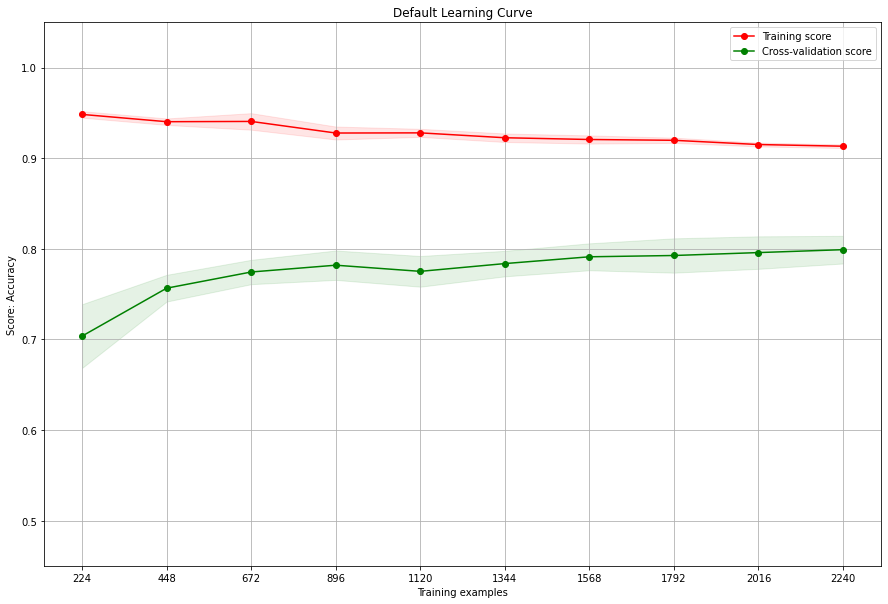

In [4]:
ylim=(0.45, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)


In [4]:
C = [i for i in np.arange(0.1, 5, 0.1)]
gamma = [i for i in np.arange(0.01, .75, .01)]
kernel = ["linear", "rbf", "poly"]
degree = [3, 4]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 990 out of 990 | elapsed:  6.1min finished


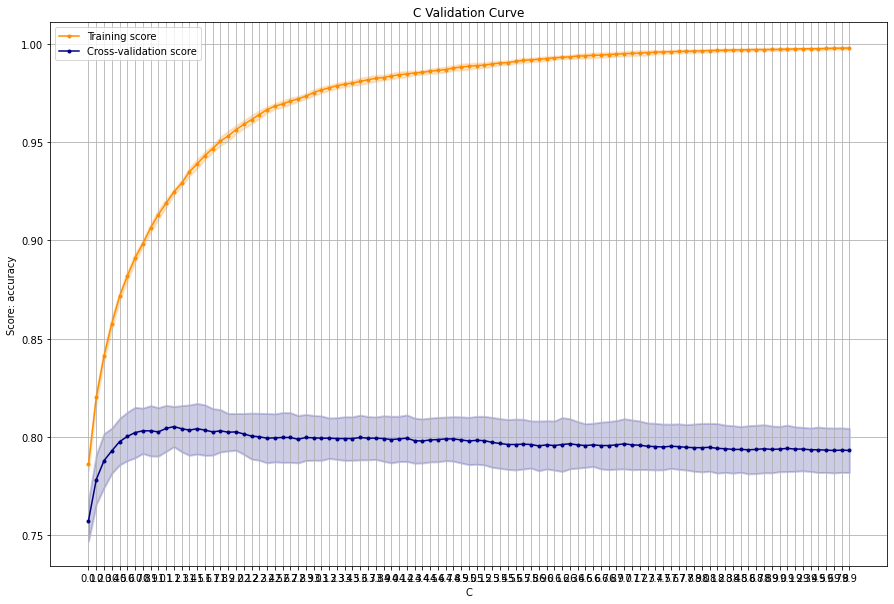

In [6]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(svm.SVC(), X_train, y_train, "C", C, 'accuracy', cv=TrainingCurves.get_cv())


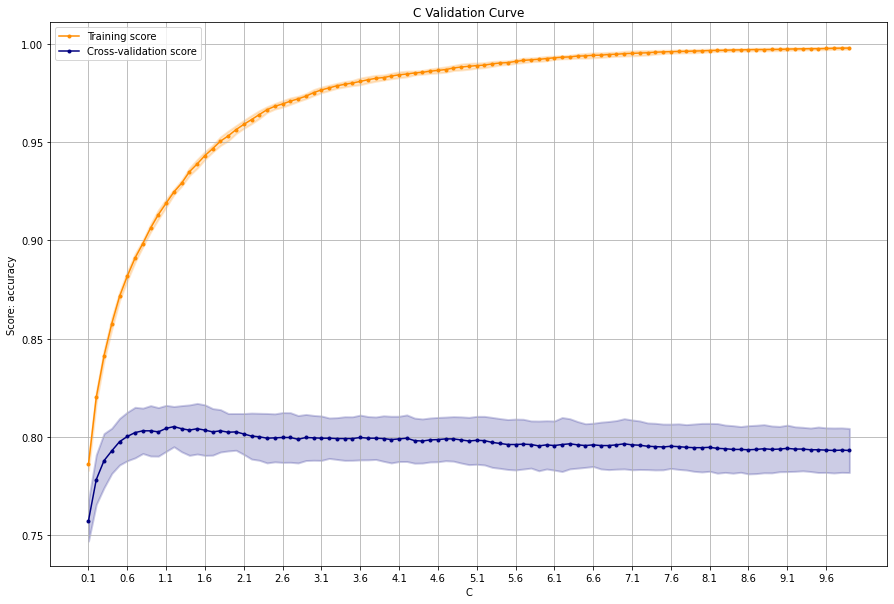

In [8]:
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "C", C, title="C Validation Curve", scoring="accuracy", tick_spacing=5)


In [16]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(svm.SVC(), X_train, y_train, "gamma", gamma, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 740 | elapsed:   27.8s remaining:  4.7min
[Parallel(n_jobs=-1)]: Done 141 out of 740 | elapsed:   55.7s remaining:  3.9min
[Parallel(n_jobs=-1)]: Done 216 out of 740 | elapsed:  1.4min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done 291 out of 740 | elapsed:  1.9min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done 366 out of 740 | elapsed:  2.3min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done 441 out of 740 | elapsed:  2.8min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done 516 out of 740 | elapsed:  3.3min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done 591 out of 740 | elapsed:  3.8min remaining:   57.1s
[Parallel(n_jobs=-1)]: Done 666 out of 740 | elapsed:  4.2min remaining:   28.3s
[Parallel(n_jobs=-1)]: Done 740 out of 740 | elapsed:  4.7min finished


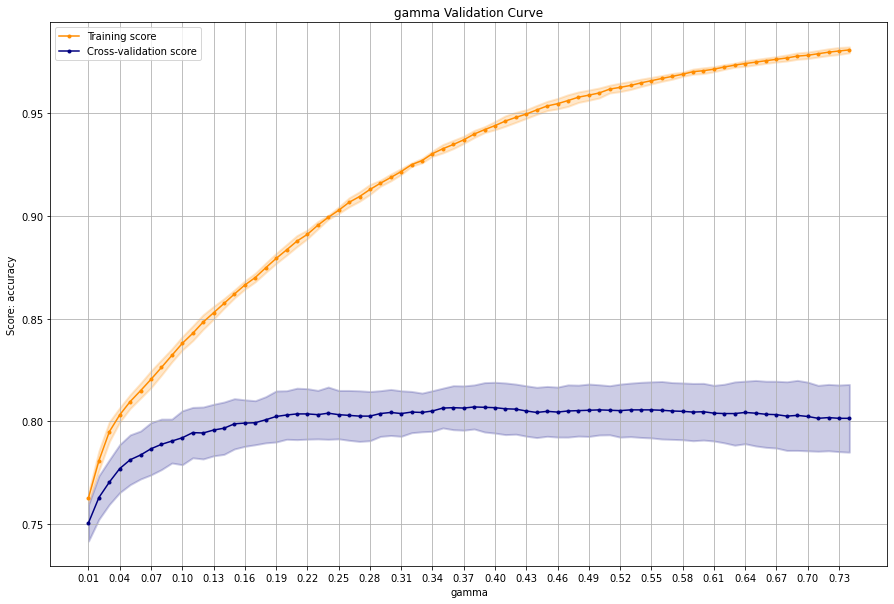

In [18]:
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "gamma", gamma, title="gamma Validation Curve", scoring="accuracy", tick_spacing=3)


In [5]:
parameters = {"kernel": kernel, 'C': C, 'gamma': gamma}

gs = common_SVM.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX)

gs_results = gs

NOT performing Grid Search


Plot saved as:  Figures/Faces_SVM_GS_ModelComplexity_C_gamma_kernel.png


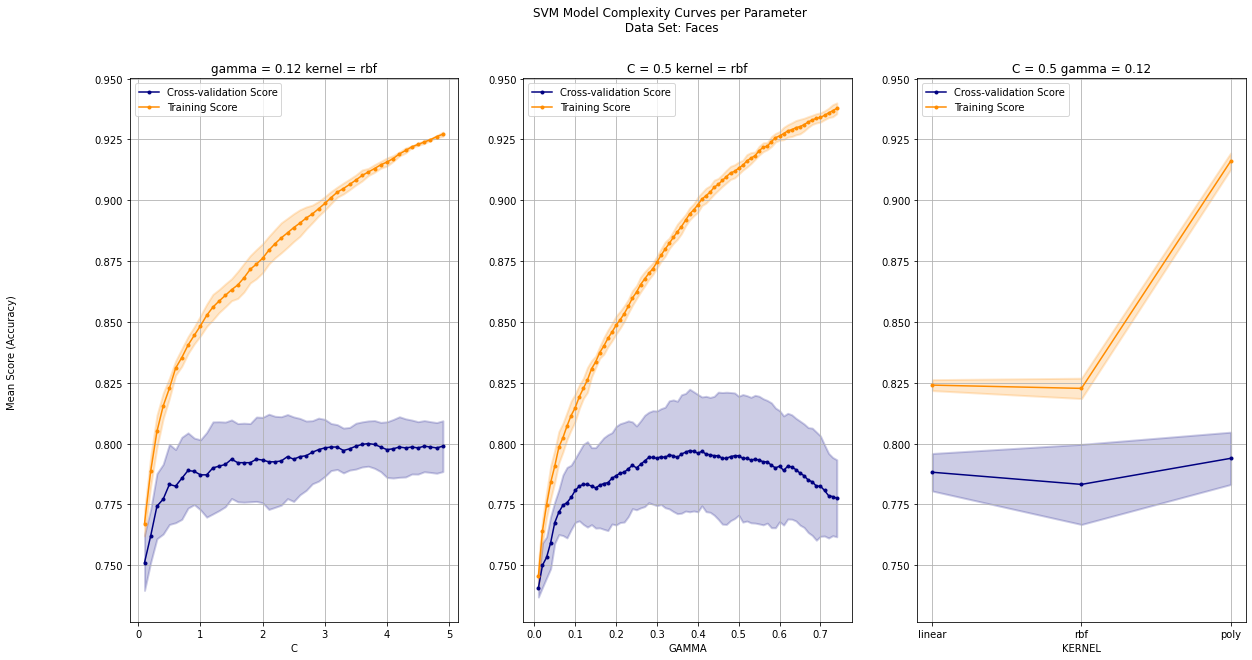

In [6]:
unused_params_values = {'gamma': min(gamma), 'C': min(C), 'kernel': 'linear'}
unused_params_values = {'kernel': 'rbf', 'gamma':0.12, 'C':0.5}
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values)

Plot saved as:  Figures/Faces_SVM_GS_Times_C_gamma_kernel.png


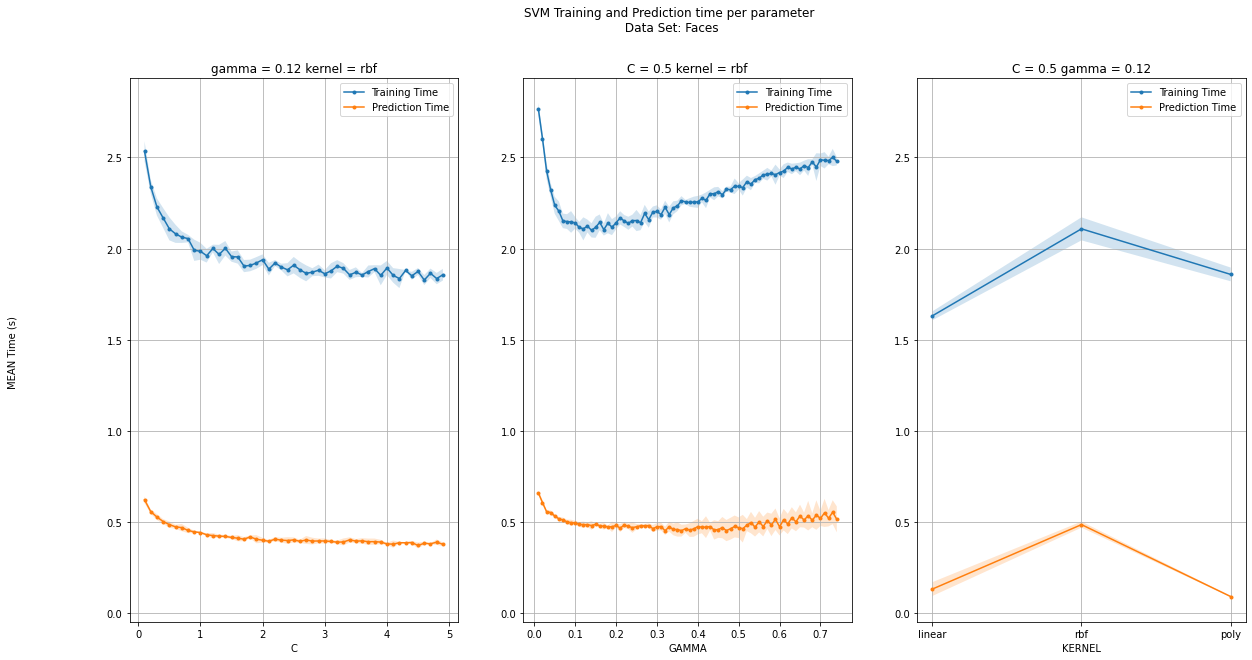

In [7]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values)

Plot saved as:  Figures/Faces_SVM_GS_ModelComplexity_C_gamma_kernel.png


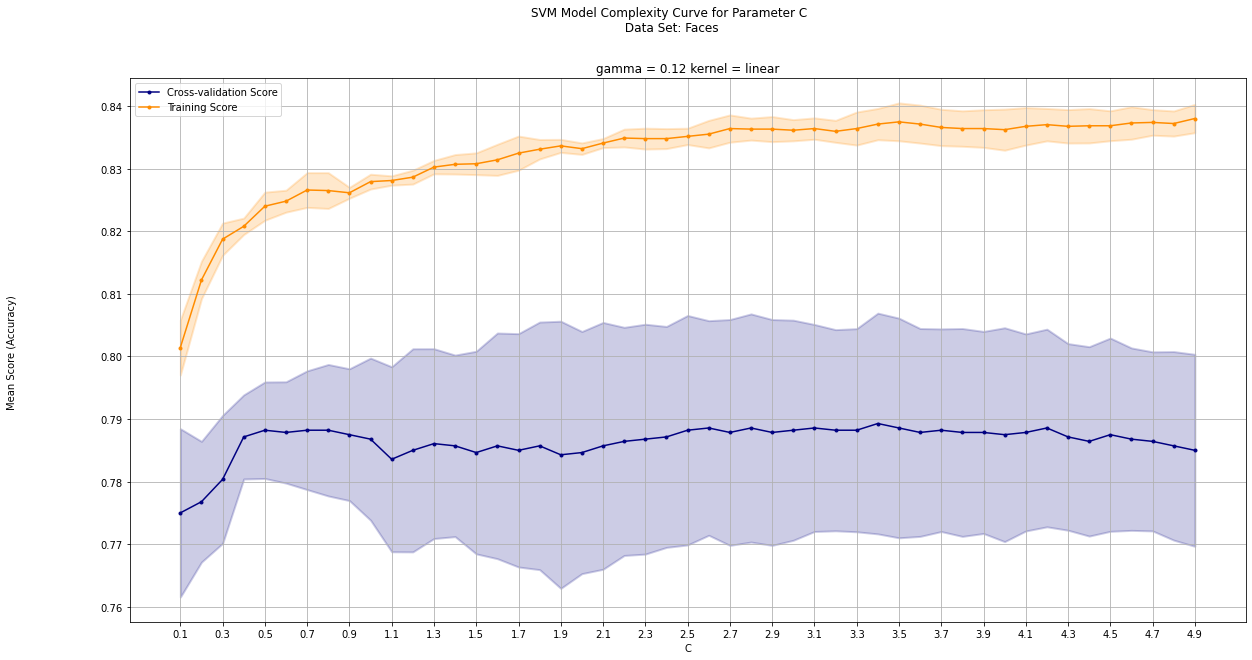

Plot saved as:  Figures/Faces_SVM_GS_ModelComplexity_C_gamma_kernel.png


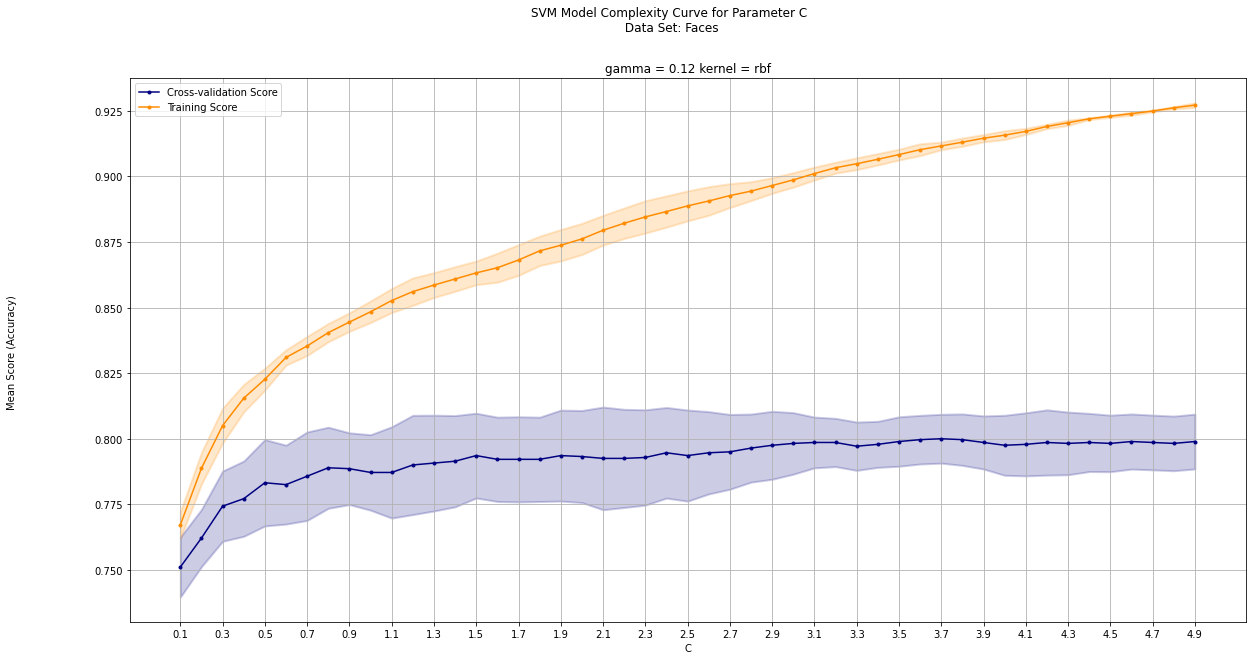

Plot saved as:  Figures/Faces_SVM_GS_ModelComplexity_C_gamma_kernel.png


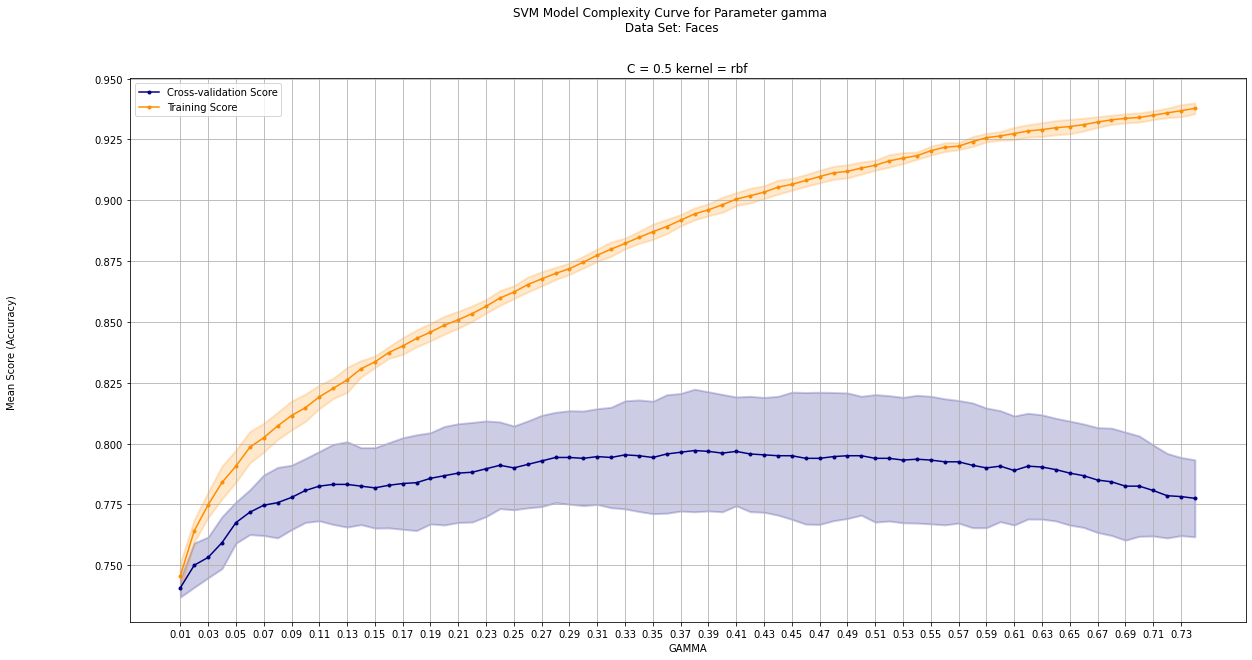

In [8]:
unused_params_values['kernel'] = 'linear'
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'C', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_values, tick_spacing=2)
unused_params_values['kernel'] = 'rbf'
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'C', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_values, tick_spacing=2)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'gamma', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_values, tick_spacing=2)


Plot saved as:  Figures/Faces_SVM_GS_Times_C_gamma_kernel.png


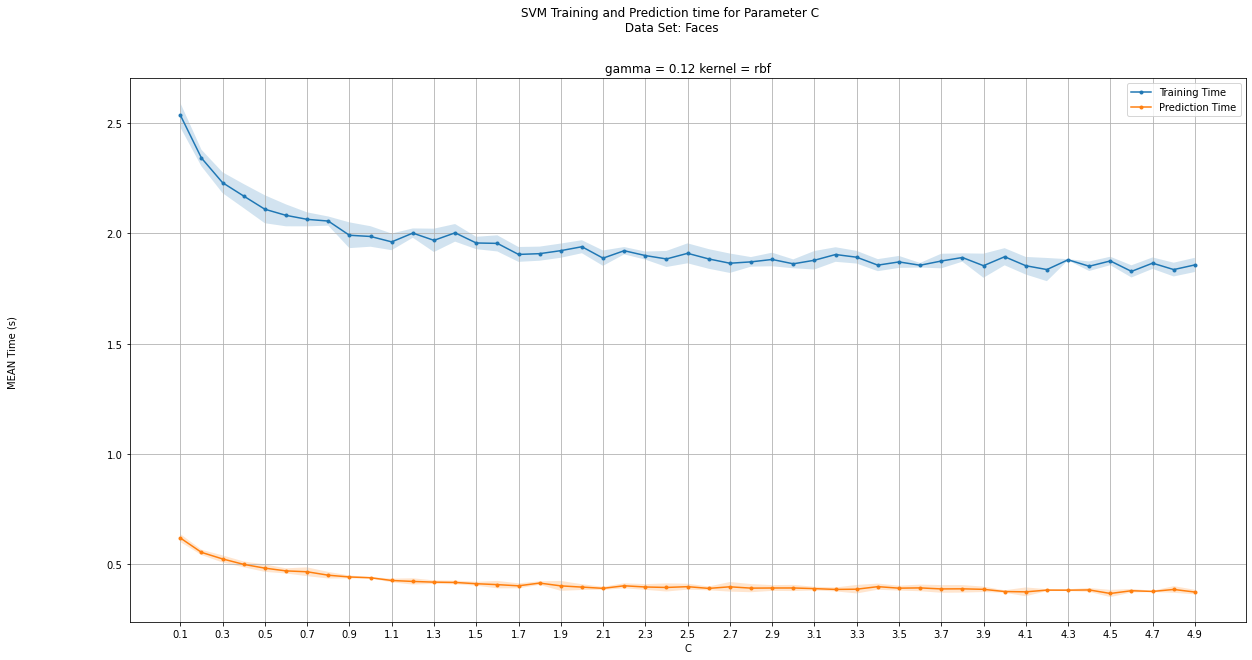

In [9]:
common_grid_search_analysis.plot_grid_search_training_times_1param(gs_results, 'C', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_values, tick_spacing=2)

Plot saved as:  Figures/Faces_SVM_GS_ModelComplexity_C_gamma_kernel.png


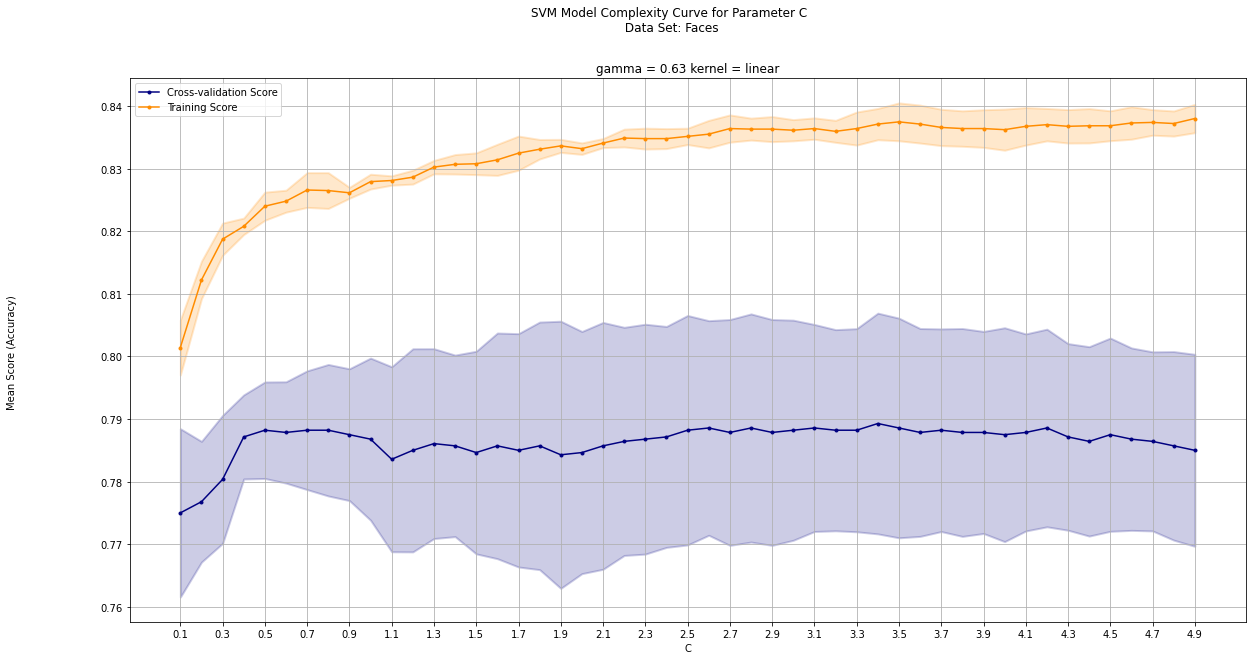

Plot saved as:  Figures/Faces_SVM_GS_ModelComplexity_C_gamma_kernel.png


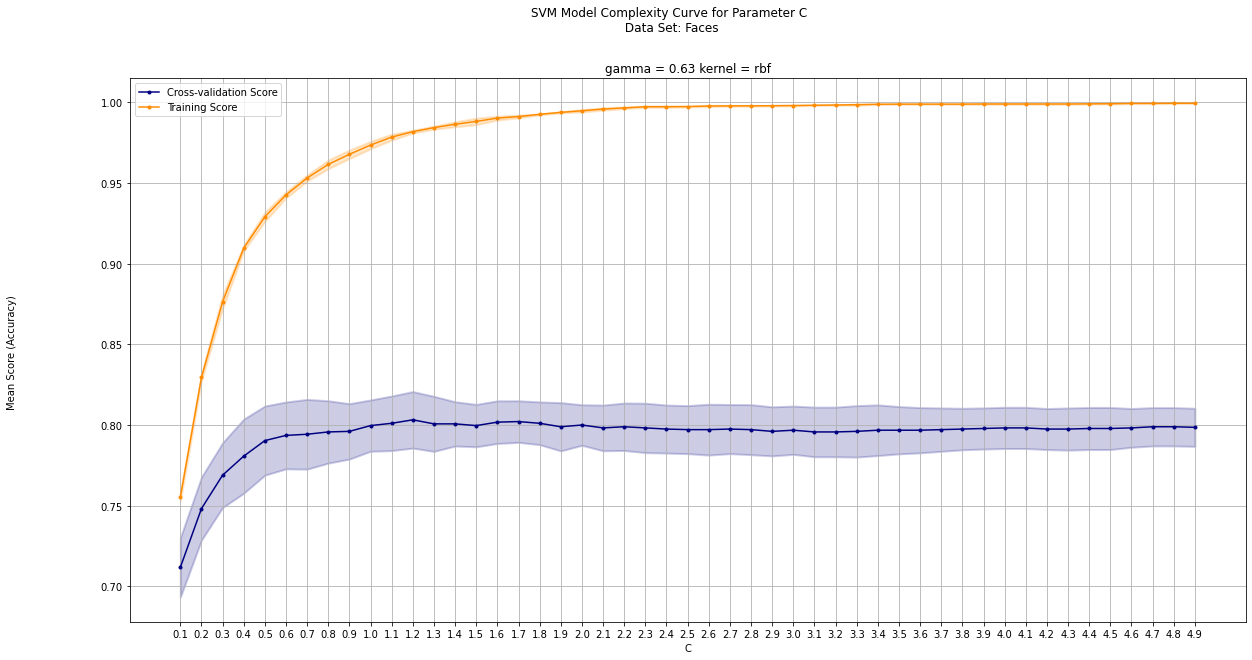

In [18]:
unused_params_values = {'kernel': 'linear'}
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, plot_param='C', unused_params_value_dict=unused_params_values, tick_spacing=2)

unused_params_values = {'kernel': 'rbf'}
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, plot_param='C', unused_params_value_dict=unused_params_values)


Plot saved as:  Figures/FACES_SVM_PLOT_GridScore_C_gamma_6.png


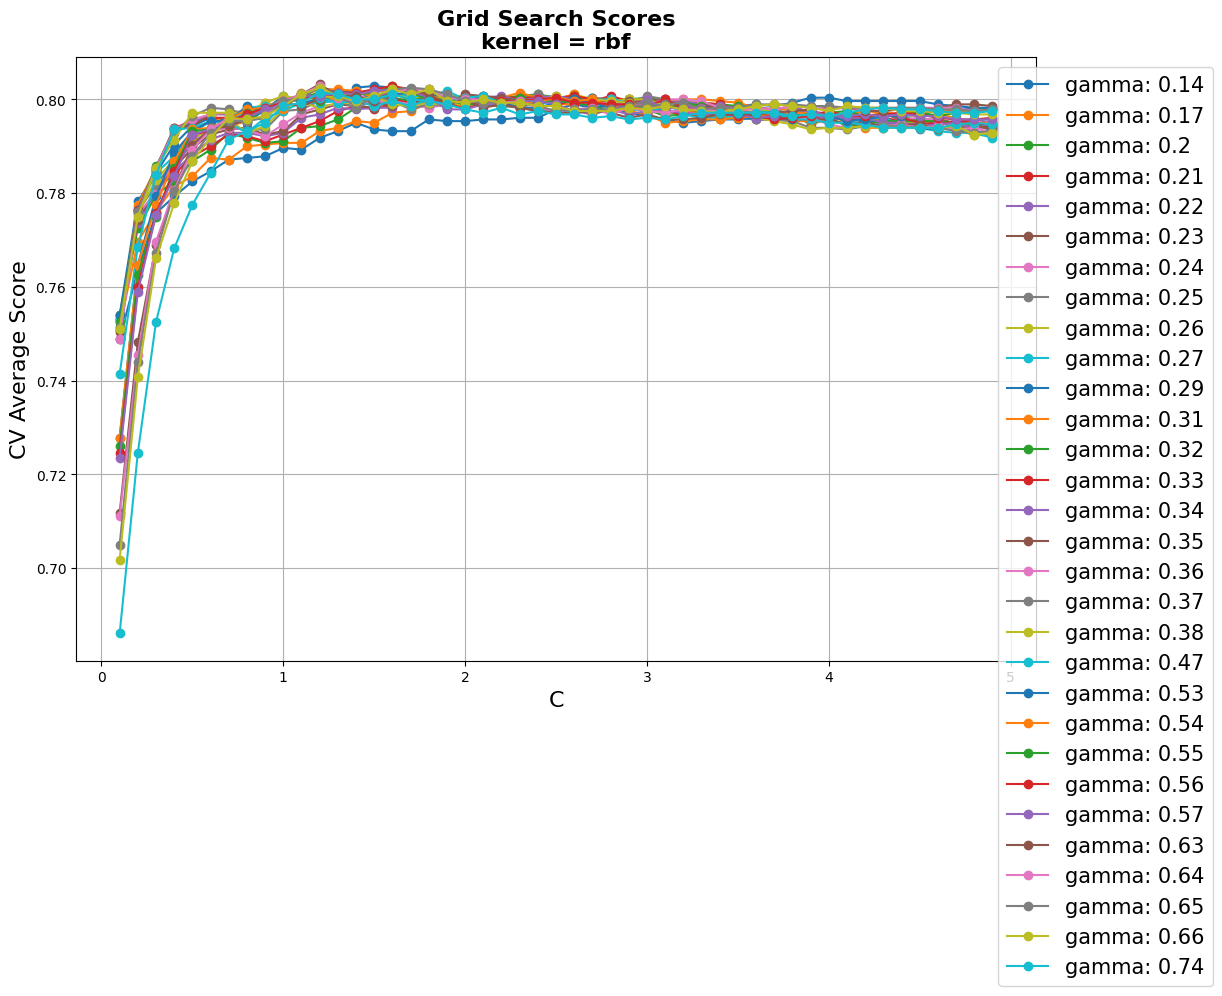

In [15]:
mean_score_limit=0.797
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'C', 'gamma', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

Plot saved as:  Figures/FACES_SVM_PLOT_GridScore_kernel_C_16.png


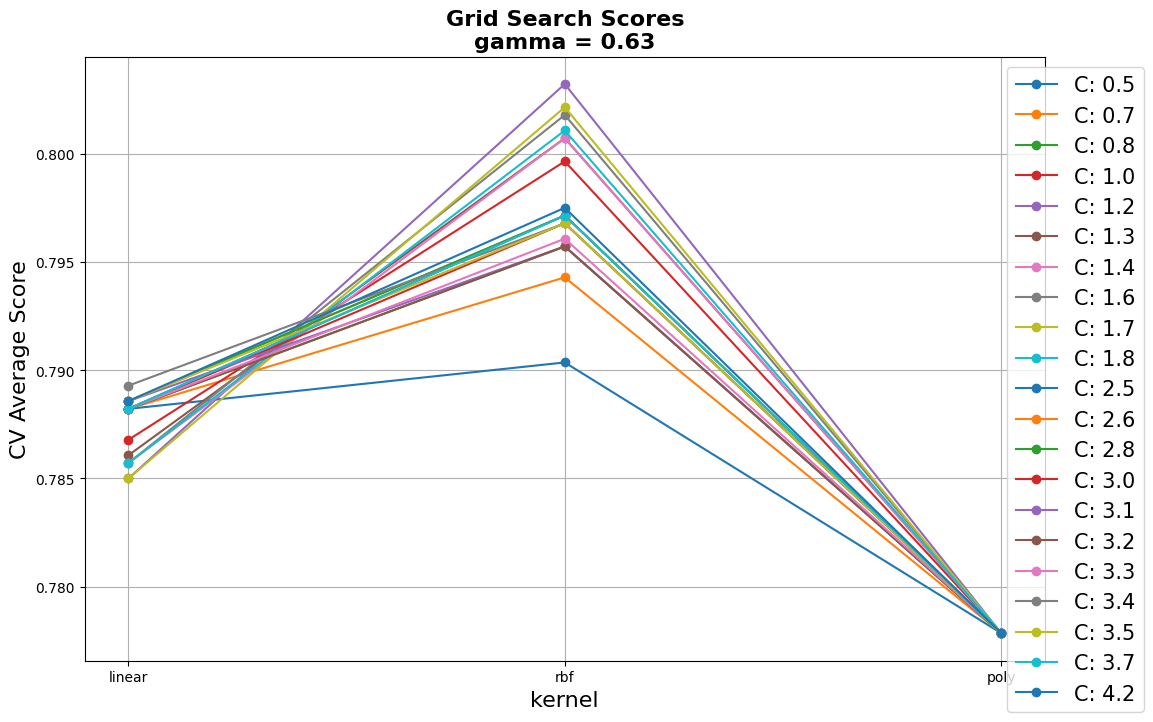

In [25]:
mean_score_limit=0.788
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'kernel', 'C', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

Plot saved as:  Figures/FACES_SVM_PLOT_GridScore_kernel_gamma_17.png


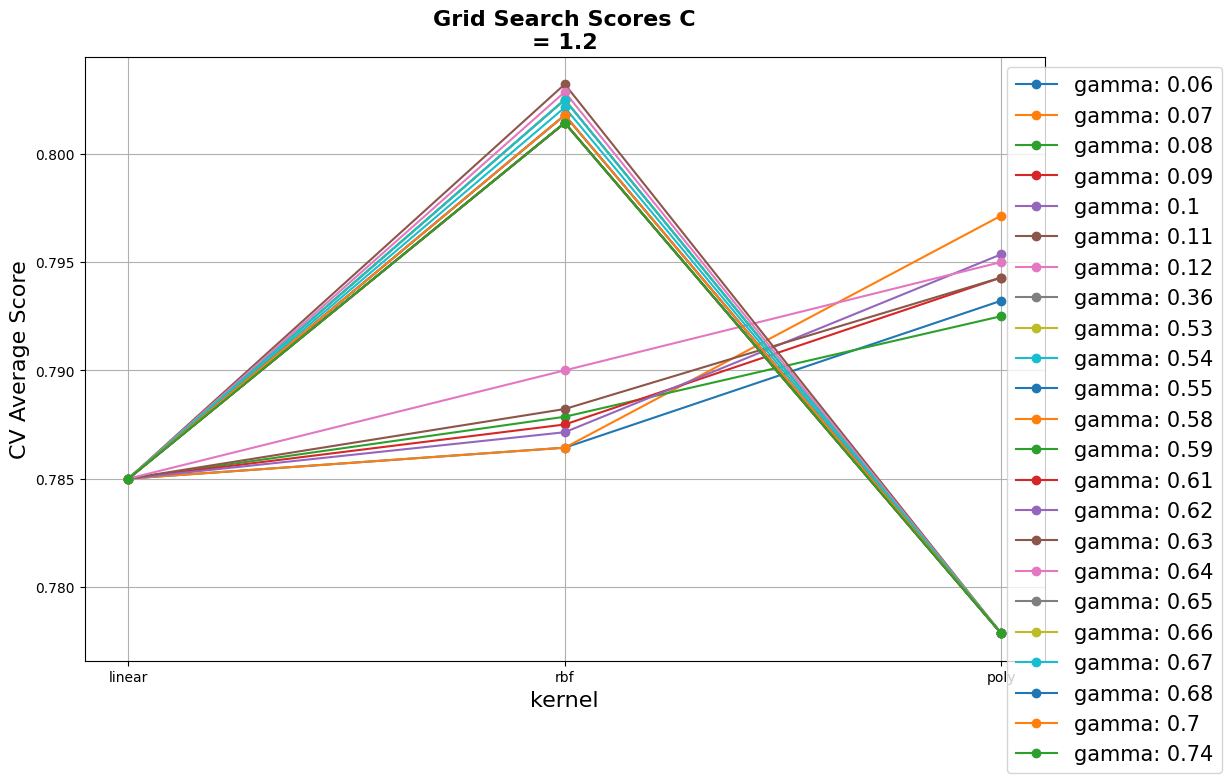

In [26]:
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'kernel', 'gamma', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

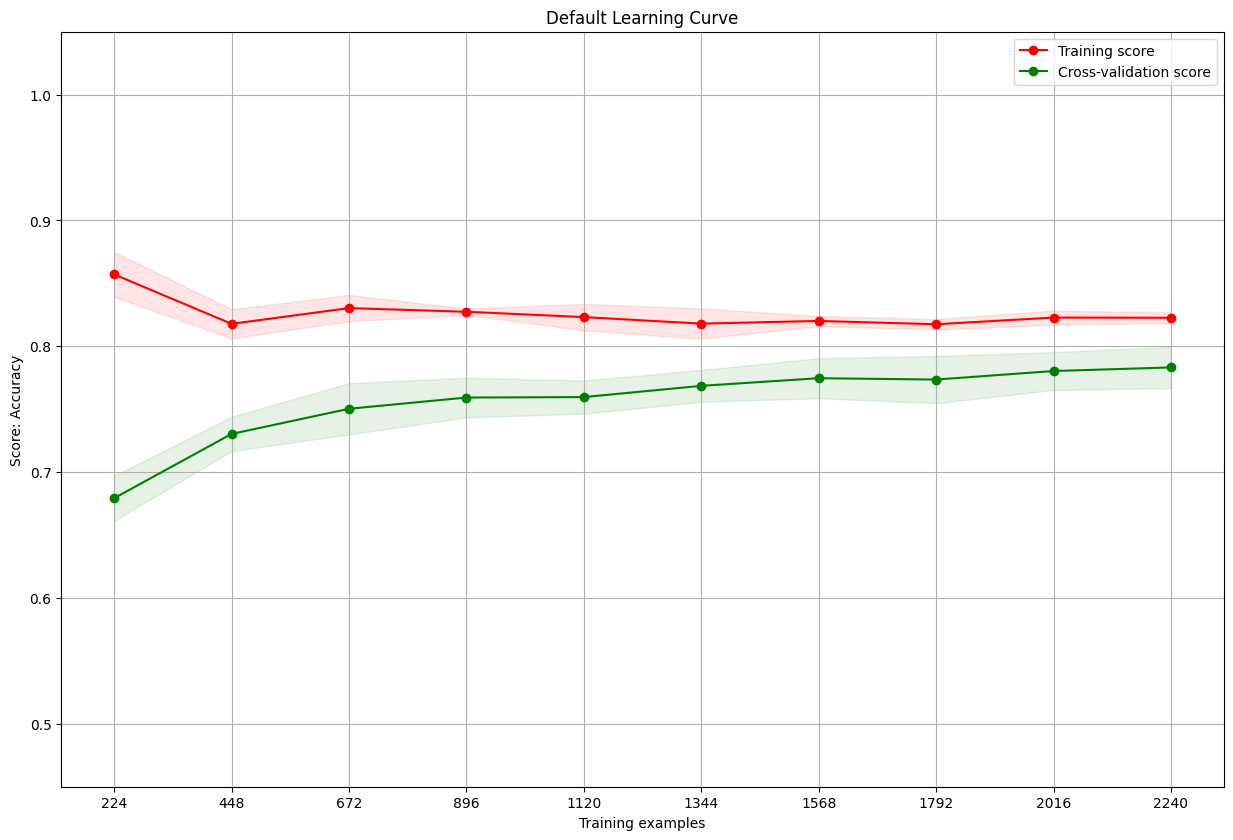

In [29]:
params={'kernel': 'rbf', 'gamma':0.12, 'C':0.5}
ylim=(0.45, 1.05)

train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(svm.SVC(**params), X_train, y_train, "accuracy")
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)


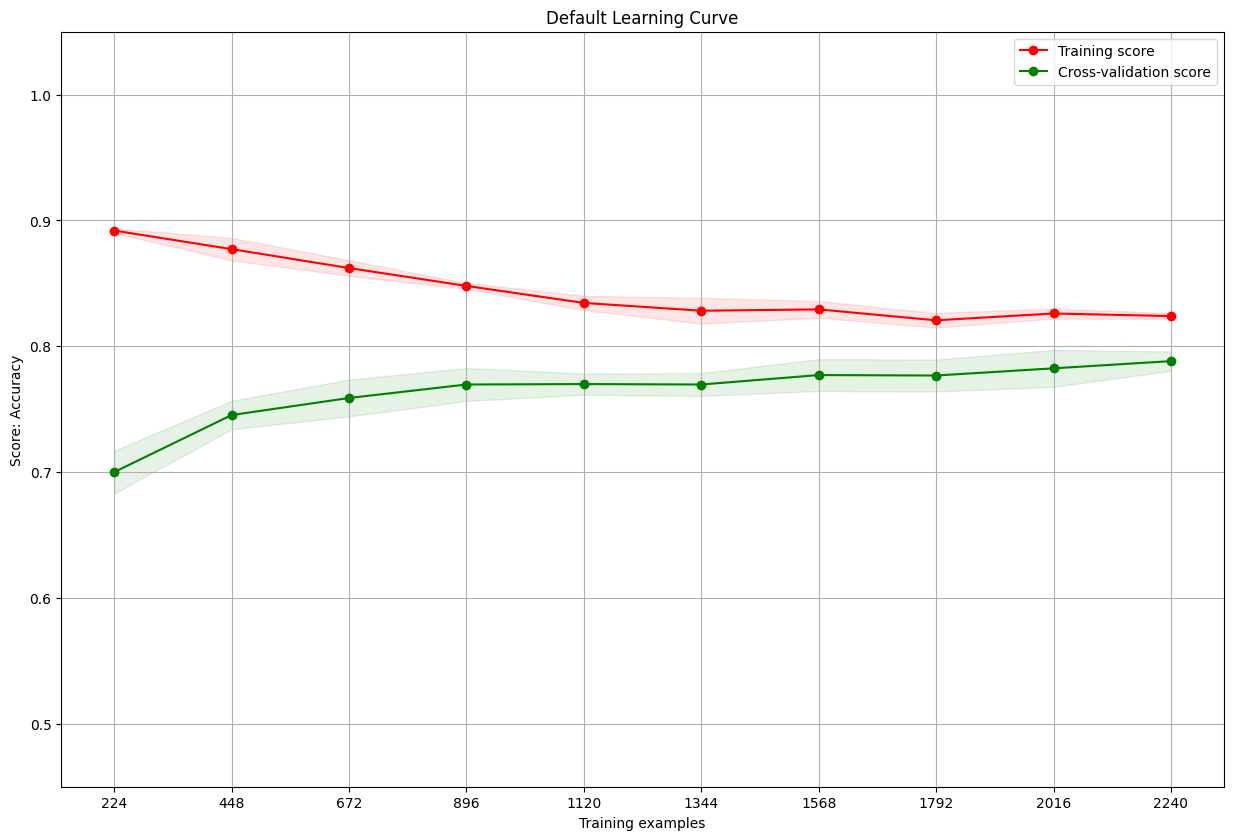

In [28]:
params={'kernel': 'linear', 'C':0.5}
ylim=(0.45, 1.05)

train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(svm.SVC(**params), X_train, y_train, "accuracy")
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)
